In [325]:
%reset -f
from wavhandler import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [360]:
dataset1 = Dataset('Pcfruit')
dataset1.read(data='D. suzukii')

Read filenames in 0.04 seconds.
Loaded data into matrix in 0.78 seconds.


### Example signal

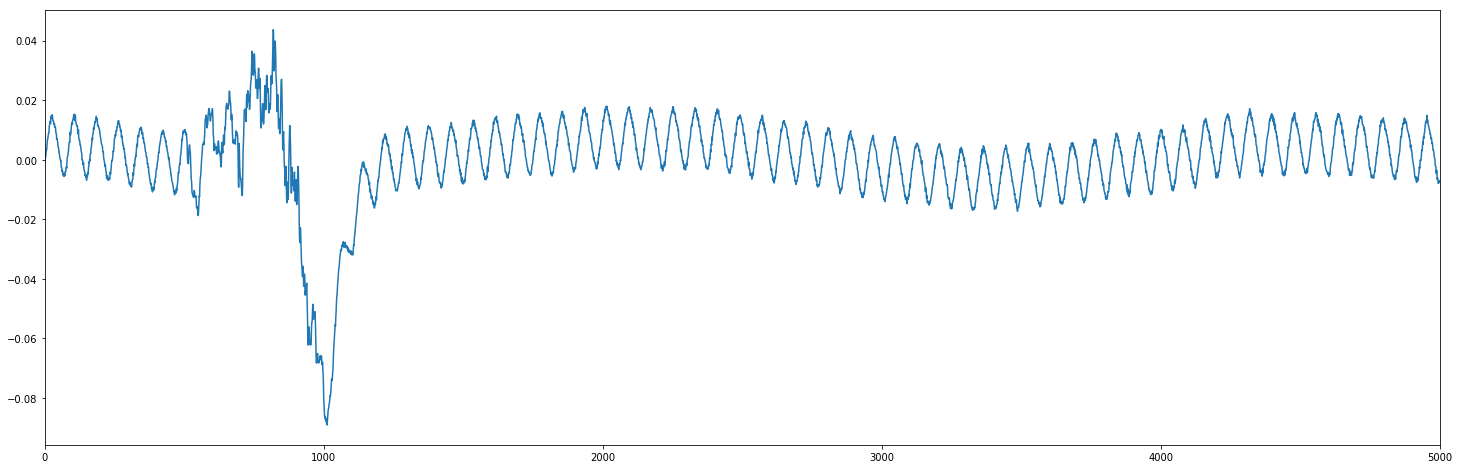

In [361]:
dataset1.X.iloc[np.random.randint(0,dataset1.X.shape[0]),:].plot(figsize=(25,8))

# 1. We should compare the raw time series within insect groups

### - They all have the same trigger point, BUT it might be a false trigger and it could be 2 insects instead of 1 (FIND FALSE TRIGGERS - e.g. std of some miliseconds after trigger)

In [362]:
rdm = np.random.randint(0,dataset1.X.shape[0])
sig = dataset1.X.iloc[rdm,:]
rdm_sig = sig.pow(2).rolling(100).mean().pow(1/2)
rdm_sig.idxmax()

1060

### Finding the index of max RMS value for all signals (which should be the trigger point)

In [363]:
rms_idx = dataset1.X.apply(lambda x: x.pow(2).rolling(50).mean().pow(1/2).idxmax(), axis=1).describe()
rms_idx

count    6423.000000
mean     1133.828429
std       409.028124
min        49.000000
25%      1017.000000
50%      1038.000000
75%      1085.000000
max      4937.000000
dtype: float64

### Calculating statistics around the trigger point

count    400.000000
mean      -0.024232
std        0.029464
min       -0.078766
25%       -0.058578
50%       -0.019699
75%        0.001526
max        0.017914
Name: 481, dtype: float64

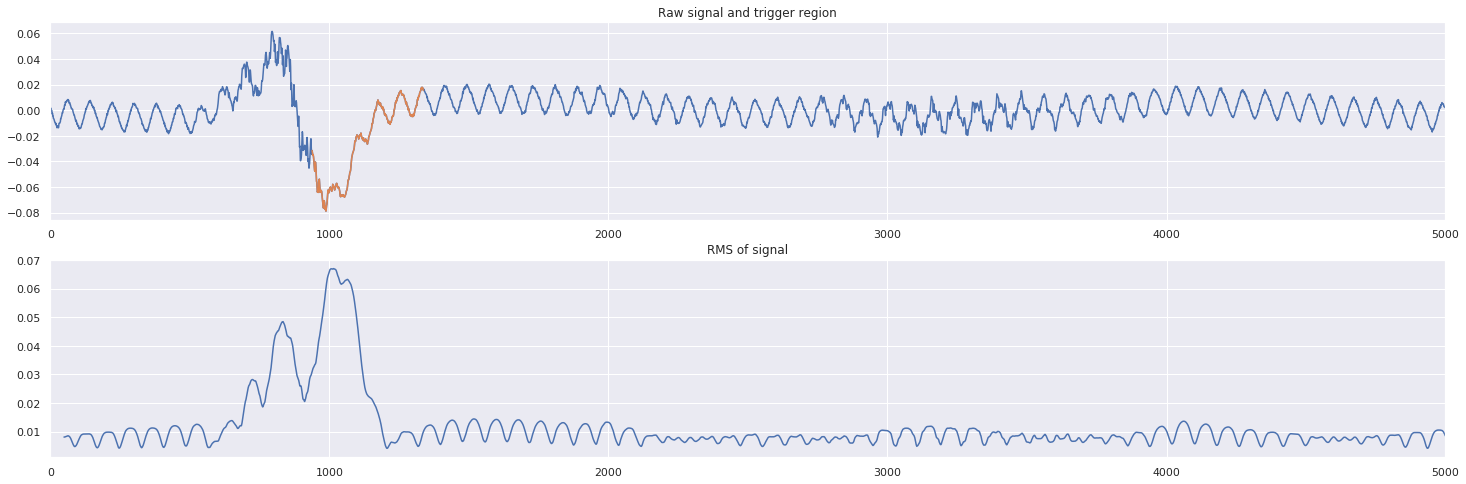

In [474]:
rdm = np.random.randint(0,dataset1.X.shape[0])
idx = int(rms_idx['50%'])
sig = dataset1.X.iloc[rdm,:]
plt.figure()
plt.subplot(2,1,1)
plt.plot(sig)
sig_trig = sig.iloc[idx-100:idx-100+400]
sig_trig.plot(figsize=(25,8), title='Raw signal and trigger region')
plt.subplot(2,1,2)
sig.pow(2).rolling(50).mean().pow(1/2).plot(title='RMS of signal')

sig_trig.describe()

In [477]:
df_trig = dataset1.X.apply(lambda x: x.iloc[idx-15:idx+300], axis=1)
df_trig.shape

(6423, 315)

Explained Variance with 2 components: 0.76


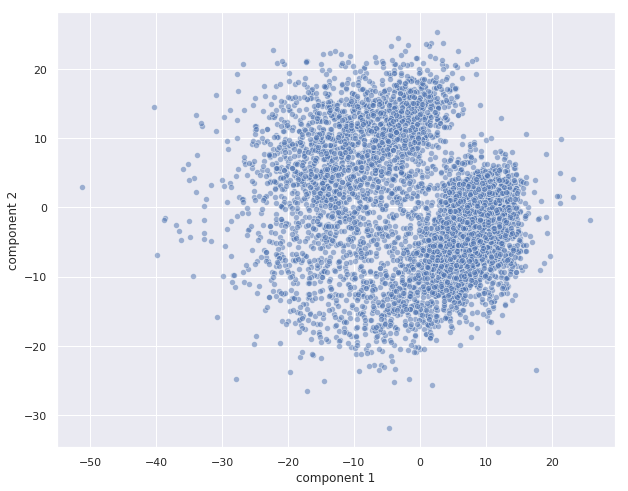

In [481]:
from utils import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
X = df_trig.values
y= pd.Series(np.ones((6423,)))

X_std = StandardScaler().fit_transform(X)  # standardization of data

ncomps=2
setting = 'pca'
pca = PCA(n_components=ncomps) 
X_final = pca.fit_transform(X_std)
print("Explained Variance with {0:d} components: {1:.2f}".format(ncomps,pca.explained_variance_ratio_.sum()) )

d = pd.DataFrame(X_final)
d['rowmean'] = d.mean(axis=1)
X_final = d[d['rowmean'] < 50][[0,1]].values
plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.5, legend='full') 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

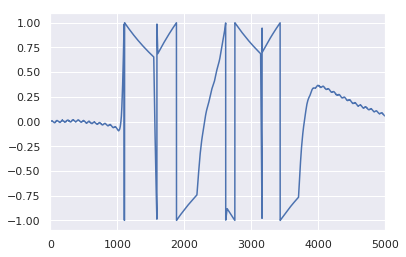

In [498]:
# df_trig.iloc[6123,:].plot()
dataset1.X.iloc[6123,:].plot()

In [494]:
d[d['rowmean'] > 50][[0,1]].index

Int64Index([6120, 6121, 6122, 6123], dtype='int64')